In [ ]:
from google.colab import files


uploaded = files.upload()

Saving iris (2).csv to iris (2) (1).csv


In [ ]:
import pandas as pd

df = pd.read_csv('iris (2).csv')

print(df.columns)
encoded_species = pd.get_dummies(df['species'], prefix='Species')

df = pd.concat([df, encoded_species], axis=1)
df = df.drop(df.columns[df.columns.str.contains('species', case=False)][0], axis=1)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,Species_setosa,Species_versicolor,Species_virginica
0,5.1,3.5,1.4,0.2,True,False,False
1,4.9,3.0,1.4,0.2,True,False,False
2,4.7,3.2,1.3,0.2,True,False,False
3,4.6,3.1,1.5,0.2,True,False,False
4,5.0,3.6,1.4,0.2,True,False,False


In [ ]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,Species_setosa,Species_versicolor,Species_virginica
145,6.7,3.0,5.2,2.3,False,False,True
146,6.3,2.5,5.0,1.9,False,False,True
147,6.5,3.0,5.2,2.0,False,False,True
148,6.2,3.4,5.4,2.3,False,False,True
149,5.9,3.0,5.1,1.8,False,False,True


In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

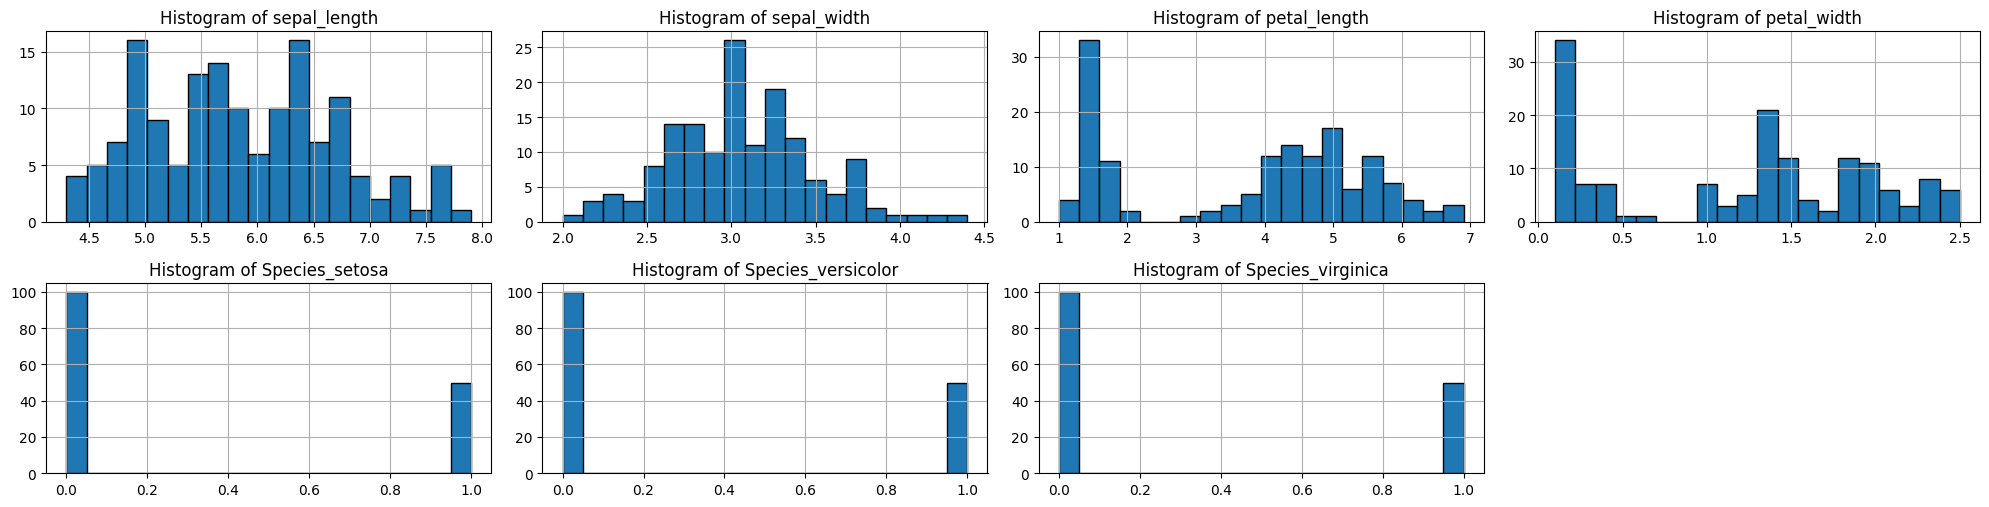

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
features = df.columns.tolist()
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features):
    plt.subplot(6, 4, i + 1)
    if df[feature].dtype == bool:
        df[feature] = df[feature].astype(int)
    df[feature].hist(bins=20, edgecolor='black')
    plt.title(f'Histogram of {feature}')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
df = pd.read_csv('iris (2).csv')
X = df.drop('species', axis=1)
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:

print("Values in ytrain")
print(y_train.value_counts())

Values in ytrain
species
setosa        38
virginica     37
versicolor    37
Name: count, dtype: int64


In [ ]:
import pandas as pd
import numpy as np

def entropy(y):


  _, y_numerical = np.unique(y, return_inverse=True)
  hist = np.bincount(y_numerical)
  ps = hist / len(y)
  return -np.sum(p * np.log2(p) for p in ps if p > 0)

def information_gain(X, y, feature_index):



  feature_values = X[:, feature_index]
  unique_values = np.unique(feature_values)

  entropy_parent = entropy(y)

  weighted_entropy = 0
  for value in unique_values:
    subset_indices = np.where(feature_values == value)[0]
    subset_entropy = entropy(y[subset_indices])
    weighted_entropy += len(subset_indices) / len(y) * subset_entropy

  information_gain = entropy_parent - weighted_entropy
  return information_gain
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
feature_index = 0
gain = information_gain(X, y, feature_index)
print("Information Gain:", gain)

Information Gain: 0.8769376208910578


<ipython-input-41-497cc4829fbc>:10: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return -np.sum(p * np.log2(p) for p in ps if p > 0)


Pearson correlation between sepal_length and sepal_width: -0.11756978413300088


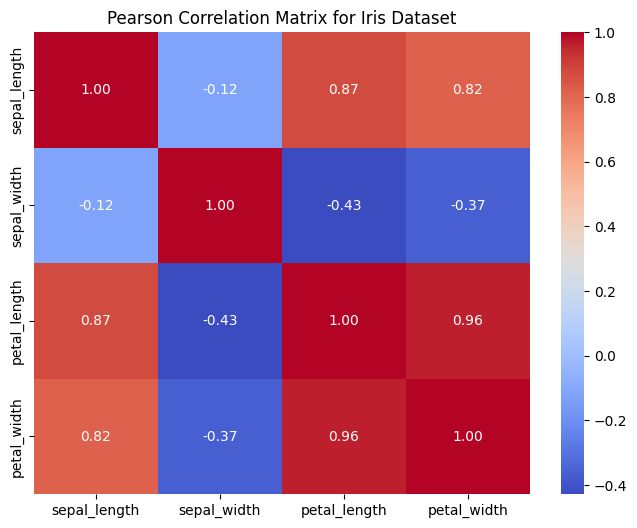

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
numerical_df = df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()
sepal_length_sepal_width_corr = correlation_matrix.loc['sepal_length', 'sepal_width']

print(f"Pearson correlation between sepal_length and sepal_width: {sepal_length_sepal_width_corr}")
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Pearson Correlation Matrix for Iris Dataset")
plt.show()

In [ ]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Feature Importances:
 [('petal width (cm)', 0.4339818709871682), ('petal length (cm)', 0.4173081338019912), ('sepal length (cm)', 0.10410500706117767), ('sepal width (cm)', 0.04460498814966301)]
